In [21]:
from importlib import reload
from collections import Counter

In [23]:
import medvqa
from medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management import MIMICCXR_VQA_Trainer
from medvqa.datasets.iuxray import IUXRAY_CACHE_DIR, IUXRAY_IMAGE_INFO_JSON_PATH
from medvqa.datasets.mimiccxr import MIMICCXR_CACHE_DIR
from medvqa.datasets.tokenizer import Tokenizer
from medvqa.utils.files import load_json_file
from medvqa.utils.images import get_image_transform
from medvqa.datasets.dataloading_utils import get_collate_batch_fn
import os

In [15]:
reload(medvqa.datasets.vqa)
reload(medvqa.datasets.mimiccxr)
reload(medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management)

<module 'medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management' from '/home/pamessina/medvqa/medvqa/datasets/mimiccxr/mimiccxr_vqa_dataset_management.py'>

In [2]:
iuxray_qa_adapted_reports_path = os.path.join(IUXRAY_CACHE_DIR, "qa_adapted_reports.json")
mimiccxr_qa_adapted_reports_path = os.path.join(MIMICCXR_CACHE_DIR, "qa_adapted_reports.json")
iuxray_qa_reports = load_json_file(iuxray_qa_adapted_reports_path)
mimiccxr_qa_reports = load_json_file(mimiccxr_qa_adapted_reports_path)

In [3]:
tokenizer = Tokenizer(qa_adapted_filenames=["qa_adapted_reports.json",
                                            "qa_adapted_reports.json"],
                          qa_adapted_datasets=[iuxray_qa_reports, mimiccxr_qa_reports],
                          min_freq=5)

Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports.json;qa_adapted_reports.json).pkl ...


In [5]:
img_transform = get_image_transform()

In [7]:
collate_batch_fn = get_collate_batch_fn()

In [9]:
split_kwargs = dict(
    n_val_examples_per_question = 10,
    min_train_examples_per_question = 100,
)

In [17]:
mvt = MIMICCXR_VQA_Trainer(img_transform, 36, collate_batch_fn, "qa_adapted_reports.json",
                           split_kwargs, tokenizer, debug=True)

Checking if data is already cached in path /home/pamessina/medvqa-workspace/cache/mimiccxr/mimiccxr_preprocessed_train_data__(dataset=qa_adapted_reports.json;split_params=(100,10);tokenizer=5251,42509,2730556597987494786).pkl ...
	Yes, it is, data successfully loaded :)
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/qa_adapted_reports.json
Loading /mnt/data/mimic-cxr-jpg/mimic-cxr-2.0.0-metadata.csv
Loading /mnt/data/mimic-cxr-jpg/mimic-cxr-2.0.0-split.csv
reading MIMIC-CXR splits ...
reading MIMIC-CXR metadata ...


1315it [00:00, 13136.45it/s]

preprocessing MIMIC-CXR vqa dataset ...


227835it [00:18, 12112.42it/s]


splitting data into training and validation ...
generating training and validation datasets ...
	len(self.train_datasets) = 95
generating training and validation dataloaders ...
done!


In [22]:
Counter(mvt.image_views)

Counter({'PA': 743759,
         'AP': 1161077,
         nan: 17077,
         'LL': 107,
         'LATERAL': 102,
         'AP AXIAL': 4,
         'LPO': 7})

In [37]:
import random
from IPython.display import Image

(1681182, 'AP', '/mnt/workspace/mimic-cxr-jpg/images-small/p18/p18730144/s59495928/7a9f900c-991ec5a4-4be72126-40458a5d-318570c8.jpg')


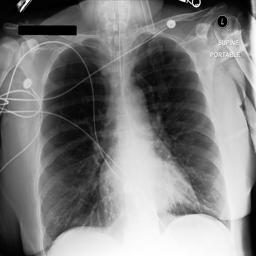

In [45]:
i = random.choice(range(len(mvt.images)))
print((i, mvt.image_views[i], mvt.images[i]))
Image(mvt.images[i])

In [24]:
iuxray_image_info = load_json_file(IUXRAY_IMAGE_INFO_JSON_PATH)

In [30]:
Counter(iuxray_image_info['classification'].values())

Counter({'lateral-left': 3426, 'frontal': 3827, 'lateral-right': 217})

In [48]:
from medvqa.datasets.iuxray.iuxray_vqa_dataset_management import _get_iuxray_image_path

In [49]:
iuxray_image_files = list(iuxray_image_info['classification'].keys())

(2097, 'frontal', '/mnt/workspace/iu-x-ray/dataset/images/CXR3731_IM-1865-1001.png')


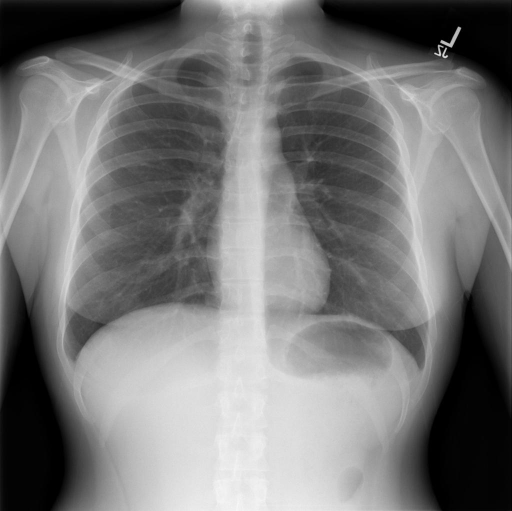

In [69]:
i = random.choice(range(len(iuxray_image_files)))
x = iuxray_image_files[i]
x_full = _get_iuxray_image_path(iuxray_image_files[i])
print((i, iuxray_image_info['classification'][x], x_full))
Image(x_full)